## Supervised Learning Algorithms: Predicting Annual Income

###### Considering this, you will pre-process and analyze a dataset, and then create three models using different algorithms. These models will be compared to one another in order to measure their performance.

###### The Census Income dataset that we'll be using contains demographical and financial information, which can be used to try and predict the level of income of an individual

In [1]:
!pip install ucimlrepo


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo

In [3]:
##fetching the dataset
census_income = fetch_ucirepo(id=20)

In [4]:
##importing libraries
import pandas as pd
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import warnings 
#warnings.filterwarnings('ignore')

In [5]:
style.use('ggplot')

In [6]:
X = pd.DataFrame(census_income.data.features)
Y = pd.DataFrame(census_income.data.targets)

In [7]:
print(census_income.metadata)

{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Sep 09 2024', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [8]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [9]:
Y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

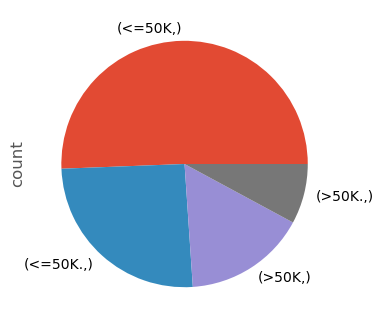

In [10]:
plt.figure(figsize=(5,4))
Y.value_counts().plot(kind='pie')
plt.tick_params(axis='x', rotation=360)
plt.show()

In [11]:
full_df = pd.concat([X,Y], axis=1)
full_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
full_df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [14]:
full_df.duplicated().sum()

29

In [15]:
##variables with missing values as question mark
full_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [16]:
full_df.replace('?', '', inplace=True)

In [17]:
full_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
full_df.drop(columns=['fnlwgt','education','relationship','race','sex'], axis=1, inplace=True)

In [19]:
counts = full_df['workclass'].value_counts()
counts

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
                     1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [20]:
labels = counts.index
sizes = counts.values

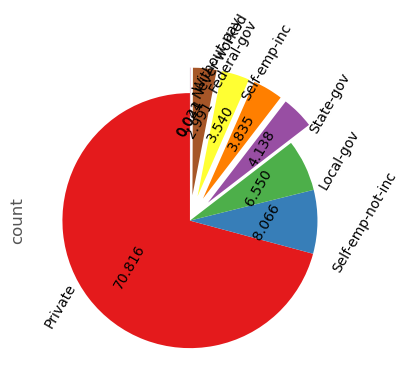

In [21]:
plt.figure(figsize=(5,4))
explode = [0.2 if (size / sum(sizes)) < 0.05 else 0 for size in sizes]
full_df['workclass'].value_counts().plot(kind='pie',cmap='Set1',autopct='%.3f',startangle=90,textprops={'rotation': 60},
                                        explode=explode)
plt.tight_layout()
plt.show()

In [22]:
print(len(full_df['native-country']))
print(full_df['native-country'].isnull().sum())

48842
274


##### dealing with misssing values

In [23]:
for i, var in enumerate(full_df.columns):
    print(f'var_{i}: {var}')
    print(full_df[var].isnull().sum()/len(full_df[var])*100)

var_0: age
0.0
var_1: workclass
1.9716637320339052
var_2: education-num
0.0
var_3: marital-status
0.0
var_4: occupation
1.9778059866508335
var_5: capital-gain
0.0
var_6: capital-loss
0.0
var_7: hours-per-week
0.0
var_8: native-country
0.5609925883460956
var_9: income
0.0


In [24]:
### since there is only less than 2% missing values from each of the columns we can ignore them

##### handling outliers

In [25]:
num_var = full_df.select_dtypes(include=np.number).columns
outliers = {}
for i,var in enumerate(num_var):
    print(f'var_{i}: {var}')
    min_val = full_df[var].mean(numeric_only=True)-(3*full_df[var].std(numeric_only=True))
    max_val = full_df[var].mean(numeric_only=True)+(3*full_df[var].std(numeric_only=True))
    min_val_count = (full_df[var]<=min_val).sum()
    max_val_count = (full_df[var]>max_val).sum()
    print(min_val_count)
    print(max_val_count)
    outliers[var]=[min_val_count,max_val_count,len(full_df[var])]


var_0: age
0
186
var_1: education-num
330
0
var_2: capital-gain
0
331
var_3: capital-loss
0
2216
var_4: hours-per-week
139
542


In [26]:
outliers

{'age': [0, 186, 48842],
 'education-num': [330, 0, 48842],
 'capital-gain': [0, 331, 48842],
 'capital-loss': [0, 2216, 48842],
 'hours-per-week': [139, 542, 48842]}

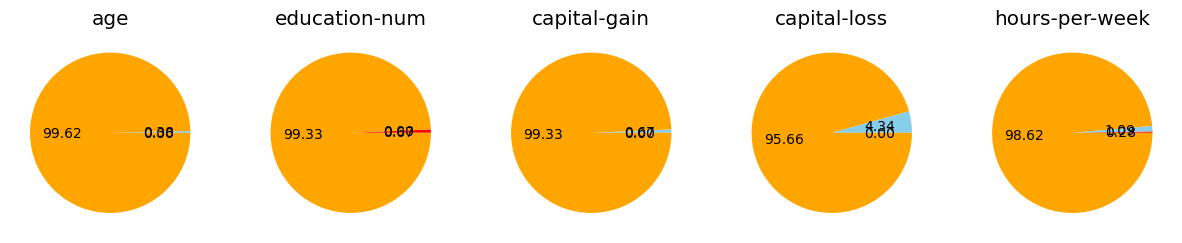

In [27]:
keys = list(outliers.keys())
colors = ['red', 'skyblue', 'orange', 'green', 'purple']
plt.subplots(1,len(outliers.keys()),figsize=(15,4))
for idx,i in enumerate(keys,start=1):
    plt.subplot(1,len(keys),idx)
    plt.pie(outliers[i], autopct='%.2f',colors=colors)
    plt.title(f'{i}')

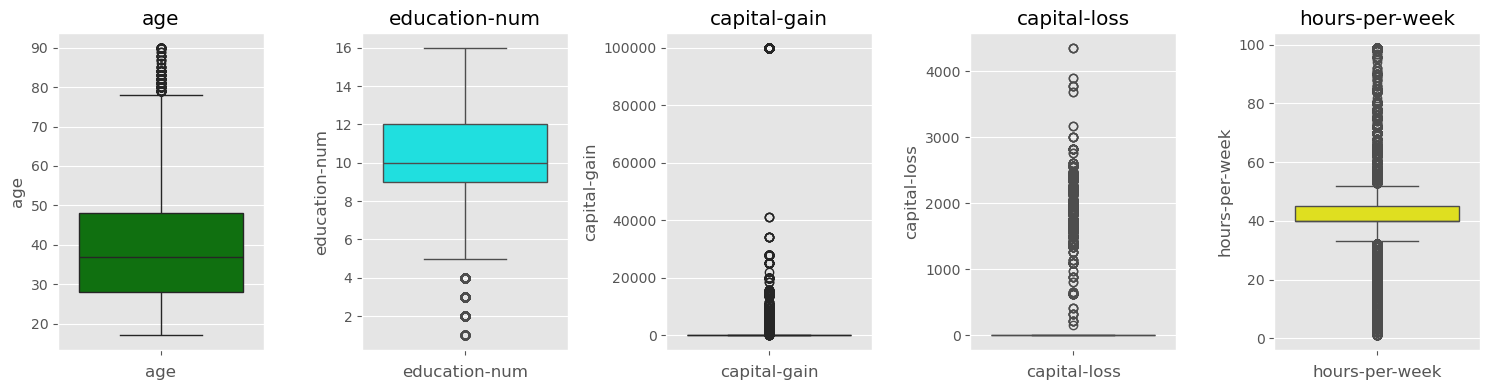

In [28]:
###visualizing the outlier data
import seaborn as sns
import random
plt.subplots(1,len(num_var),figsize=(15,4))
colors = ['red','blue','green','yellow','cyan']
for i, var in enumerate(num_var, start=1):
    plt.subplot(1,len(num_var),i)
    sns.boxplot(full_df[var],color=random.choice(colors),)
    plt.title(f'{var}')
    plt.xlabel(f'{var}')
plt.tight_layout()
plt.show()

##### as we can see the captial loss, capital gain, and hours-per-week have a lot of outliers
##### however this represent less than 5% of the data

In [29]:
### covernting categorical variables to numeric
cat_var = full_df.select_dtypes(exclude=np.number)
for var in cat_var:
    print(full_df[var].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
                     1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
                     1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
native-country
United-States                 

In [30]:
full_df.loc[full_df['income']=='<=50K.','income']='<=50K'
full_df.loc[full_df['income']=='>50K.','income']='>50K'

In [31]:
full_df

,age,workclass,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,0,0,36,United-States,<=50K
48838,64,NaN,9,Widowed,NaN,0,0,40,United-States,<=50K
48839,38,Private,13,Married-civ-spouse,Prof-specialty,0,0,50,United-States,<=50K
48840,44,Private,13,Divorced,Adm-clerical,5455,0,40,United-States,<=50K


In [32]:
#### categorical variables infer some sort of ordinality hence we will use a label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for var in cat_var:
    full_df[var] = le.fit_transform(full_df[var])

In [33]:
full_df

,age,workclass,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,13,4,1,2174,0,40,39,0
1,50,6,13,2,4,0,0,13,39,0
2,38,4,9,0,6,0,0,40,39,0
3,53,4,7,2,6,0,0,40,39,0
4,28,4,13,2,10,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...
48837,39,4,13,0,10,0,0,36,39,0
48838,64,9,9,6,15,0,0,40,39,0
48839,38,4,13,2,10,0,0,50,39,0
48840,44,4,13,0,1,5455,0,40,39,0


### Applying the Naïve Bayes Algorithm

In [34]:
full_df.head(6)

,age,workclass,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,13,4,1,2174,0,40,39,0
1,50,6,13,2,4,0,0,13,39,0
2,38,4,9,0,6,0,0,40,39,0
3,53,4,7,2,6,0,0,40,39,0
4,28,4,13,2,10,0,0,40,5,0
5,37,4,14,2,4,0,0,40,39,0


In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
full_df.shape

(48842, 10)

In [37]:
X = full_df.drop('income',axis=1)
Y = full_df['income']

In [38]:
Y = pd.DataFrame(Y)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.1, random_state=0)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(43957, 9) (43957, 1) (4885, 9) (4885, 1)


In [41]:
dev_set = X_test.shape[0]/X_train.shape[0]
print(dev_set)

0.11113133289350957


In [42]:
x_train_new,x_dev,y_train_new,y_dev = train_test_split(X_train,y_train, test_size=dev_set, random_state=0)
print(x_train_new.shape,y_train_new.shape,x_dev.shape,y_dev.shape,X_test.shape,y_test.shape)

(39072, 9) (39072, 1) (4885, 9) (4885, 1) (4885, 9) (4885, 1)


In [43]:
##train-dev set
train_ind=np.random.randint(0,len(x_train_new),50)
dev_ind = np.random.randint(0,len(x_dev),50)

In [44]:
print(train_ind,'\n',dev_ind)

[ 2732 21243 30403 32103 20757 14935 15430 14650 17089 32230 18983 24152
 35665 16921 27469 38984  6921 38804  2163  5072 37619  7877 18430  1871
  7599  2496 24675 31921 33523   797  3219 15246 24999 16321 19129 18676
 31230 11723 17591 26752 23605  6021 20006  3560 25332 31055 21368 20737
 28647 26681] 
 [3942 3191  430 4187 2446 2659 1589 2956 2681 4180 2251 4420 4870 1071
 4735 1204 3918 1167 1684 3299 2767 2957 4469  560 1605 1472 3678  256
 3762 1954  816 2435 1634  973 4464 2023 2965  201 2431 2418 4651 3455
 4226  931 1987 2787 4305 2610 4182 2059]


In [45]:
x_train_dev = pd.concat([x_train_new.iloc[train_ind,:],x_dev.iloc[dev_ind,:]])

In [46]:
y_train_dev = pd.concat([y_train_new.iloc[train_ind,:],y_dev.iloc[dev_ind,:]])

In [47]:
x_train_dev.head()

,age,workclass,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,native-country
39293,41,4,13,3,4,13550,0,60,39
25801,34,4,9,2,3,0,0,72,39
20126,37,4,13,2,4,0,0,50,39
990,46,4,13,4,12,0,1504,40,39
23642,50,7,13,3,10,6849,0,40,39


In [48]:
print(x_train_new.shape,y_train_new.shape,x_train_dev.shape,y_train_dev.shape,x_dev.shape,y_dev.shape,X_test.shape,y_test.shape)

(39072, 9) (39072, 1) (100, 9) (100, 1) (4885, 9) (4885, 1) (4885, 9) (4885, 1)


In [49]:
model = GaussianNB()
model = model.fit(x_train_new,y_train_new)

C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
sets = ['training set','training_dev_set','validation_set','testing_set']
X_sets = [x_train_new,x_train_dev,x_dev,X_test]
y_sets = [y_train_new,y_train_dev,y_dev,y_test]

In [51]:
help

Type help() for interactive help, or help(object) for help about object.

In [52]:
from sklearn import metrics
scores_nb = {}
for i in range(0,len(X_sets)):
    pred = model.predict(X_sets[i])
    score_recall = metrics.recall_score(y_sets[i],pred)
    score_pre = metrics.precision_score(y_sets[i],pred)
    acc_score = metrics.accuracy_score(y_sets[i],pred)
    error_recall = 1 - score_recall
    error_pre = 1 - score_pre
    error_acc = 1 - acc_score
    scores_nb[sets[i]] = {
    'recall': score_recall,
    'recall_error': error_recall,
    'precision': score_pre,
    'precision_error': error_pre,
    'accuracy': acc_score,
    'accuracy_error': error_acc}    

In [53]:
pd.DataFrame(scores_nb).T

,recall,recall_error,precision,precision_error,accuracy,accuracy_error
training set,0.307103,0.692897,0.663904,0.336096,0.796094,0.203906
training_dev_set,0.476190,0.523810,0.666667,0.333333,0.840000,0.160000
validation_set,0.337050,0.662950,0.674099,0.325901,0.802866,0.197134
testing_set,0.308850,0.691150,0.684314,0.315686,0.807165,0.192835


In [54]:
predictions = model.predict([[-39,6,13,4,0,2174,0,40,38]])
print(predictions)

[0]


C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


### Applying the decision tree algorithm


In [55]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [56]:
model_t = DecisionTreeClassifier()
model_t.fit(x_train_new,y_train_new)                   

DecisionTreeClassifier()

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
score = cross_val_score(model_t, x_train_new,y_train_new, cv=10,scoring='accuracy')
score

array([0.81780962, 0.81729785, 0.81801894, 0.81597133, 0.82518556,
       0.82902483, 0.82262606, 0.81673919, 0.81622728, 0.81853084])

In [59]:
print(score.mean(),score.std())

0.8197431505638123 0.00416956681672315


In [60]:
scores_tree = {}
for i in range(0,len(X_sets)):
    pred = model_t.predict(X_sets[i])
    score_recall = metrics.recall_score(y_sets[i],pred)
    score_pre = metrics.precision_score(y_sets[i],pred)
    acc_score = metrics.accuracy_score(y_sets[i],pred)
    error_recall = 1 - score_recall
    error_pre = 1 - score_pre
    error_acc = 1 - acc_score
    scores_tree[sets[i]] = {
    'recall': score_recall,
    'recall_error': error_recall,
    'precision': score_pre,
    'precision_error': error_pre,
    'accuracy': acc_score,
    'accuracy_error': error_acc}    

In [61]:
pd.DataFrame(scores_tree).T

,recall,recall_error,precision,precision_error,accuracy,accuracy_error
training set,0.892450,0.107550,0.971823,0.028177,0.967931,0.032069
training_dev_set,0.761905,0.238095,0.695652,0.304348,0.880000,0.120000
validation_set,0.605489,0.394511,0.617673,0.382327,0.816377,0.183623
testing_set,0.607080,0.392920,0.626484,0.373516,0.825384,0.174616


In [62]:
### we see that the decision tree classifier performs better in each of the sets as compared to the naive bayes classifier

In [63]:
importance = model_t.feature_importances_
features = x_train_new.columns

In [64]:
indices = importance.argsort()[::-1]
print(importance)
print(indices)
imp_f=features[indices]
imp_f

[0.17866751 0.05621556 0.13866788 0.17591485 0.08197036 0.18562075
 0.04459652 0.11009296 0.0282536 ]
[5 0 3 2 7 4 1 6 8]


Index(['capital-gain', 'age', 'marital-status', 'education-num',
       'hours-per-week', 'occupation', 'workclass', 'capital-loss',
       'native-country'],
      dtype='object')

In [65]:
ds = pd.DataFrame(list(zip(features,importance*100)),columns=['features','importance_weight']).sort_values(by='importance_weight', 
                                                                                                           ascending=False)

In [66]:
ds

,features,importance_weight
5,capital-gain,18.562075
0,age,17.866751
3,marital-status,17.591485
2,education-num,13.866788
7,hours-per-week,11.009296
4,occupation,8.197036
1,workclass,5.621556
6,capital-loss,4.459652
8,native-country,2.825360


In [67]:
predictions = model_t.predict([[-39,6,13,4,0,2174,0,40,38]])
print(predictions)

[0]


C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### The Support Vector Machine Algorithm

#### The Support Vector Machine (SVM) algorithm is a classifier that finds the hyperplane that effectively separates the observations into their class labels.

In [68]:
from sklearn.svm import SVC

In [69]:
model_s = SVC().fit(x_train_new,y_train_new)
model_s

C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [70]:
model_s.n_iter_

array([8974], dtype=int32)

In [71]:
scores_svm = {}
for i in range(0,len(X_sets)):
    pred = model_s.predict(X_sets[i])
    score_recall = metrics.recall_score(y_sets[i],pred)
    score_pre = metrics.precision_score(y_sets[i],pred)
    acc_score = metrics.accuracy_score(y_sets[i],pred)
    error_recall = 1 - score_recall
    error_pre = 1 - score_pre
    error_acc = 1 - acc_score
    scores_svm[sets[i]] = {
    'recall': score_recall,
    'recall_error': error_recall,
    'precision': score_pre,
    'precision_error': error_pre,
    'accuracy': acc_score,
    'accuracy_error': error_acc}

In [72]:
scores_svm

{'training set': {'recall': 0.2713236077095091,
  'recall_error': 0.7286763922904909,
  'precision': 0.7424242424242424,
  'precision_error': 0.25757575757575757,
  'accuracy': 0.802236895986896,
  'accuracy_error': 0.19776310401310404},
 'training_dev_set': {'recall': 0.42857142857142855,
  'recall_error': 0.5714285714285714,
  'precision': 0.75,
  'precision_error': 0.25,
  'accuracy': 0.85,
  'accuracy_error': 0.15000000000000002},
 'validation_set': {'recall': 0.29245283018867924,
  'recall_error': 0.7075471698113207,
  'precision': 0.741304347826087,
  'precision_error': 0.258695652173913,
  'accuracy': 0.8067553735926305,
  'accuracy_error': 0.1932446264073695},
 'testing_set': {'recall': 0.2734513274336283,
  'recall_error': 0.7265486725663717,
  'precision': 0.7536585365853659,
  'precision_error': 0.24634146341463414,
  'accuracy': 0.8112589559877175,
  'accuracy_error': 0.18874104401228253}}

In [74]:
pd.DataFrame(scores_svm).T

,recall,recall_error,precision,precision_error,accuracy,accuracy_error
training set,0.271324,0.728676,0.742424,0.257576,0.802237,0.197763
training_dev_set,0.428571,0.571429,0.750000,0.250000,0.850000,0.150000
validation_set,0.292453,0.707547,0.741304,0.258696,0.806755,0.193245
testing_set,0.273451,0.726549,0.753659,0.246341,0.811259,0.188741


<Axes: xlabel='income'>

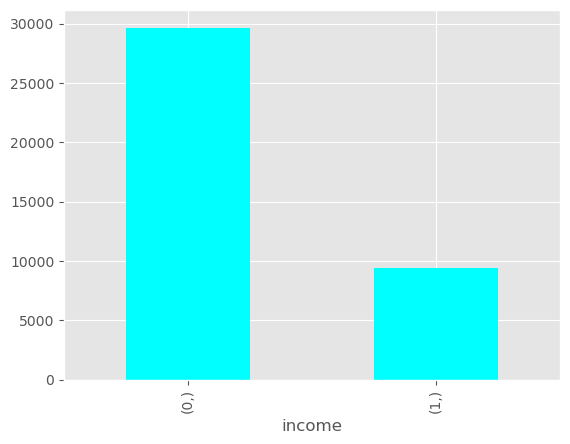

In [75]:
y_train_new.value_counts().plot(kind='bar',color='cyan')

In [76]:
model_s.predict([[-39,6,13,4,0,2174,0,40,38]])

C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [77]:
metrics = {'NB':{'Acc':[],'Pre':[],'Rec':[]},
           'DT':{'Acc':[],'Pre':[],'Rec':[]},
           'SVM':{'Acc':[],'Pre':[],'Rec':[]}}

In [78]:
### comparing the accuracy precision and recall score for all classifiers
from sklearn.metrics import accuracy_score,precision_score,recall_score
for x in range(0,len(X_sets)):
    pred_NB = model.predict(X_sets[i])
    metrics['NB']['Acc'].append(round(accuracy_score(y_sets[i],pred_NB),2))
    metrics['NB']['Pre'].append(round(precision_score(y_sets[i],pred_NB),2))
    metrics['NB']['Rec'].append(round(recall_score(y_sets[i],pred_NB),2))
    
    pred_dt = model_t.predict(X_sets[i])
    metrics['DT']['Acc'].append(round(accuracy_score(y_sets[i],pred_dt),2))
    metrics['DT']['Pre'].append(round(precision_score(y_sets[i],pred_dt),2))
    metrics['DT']['Rec'].append(round(recall_score(y_sets[i],pred_dt),2))
    
    pred_svm = model_s.predict(X_sets[i])
    metrics['SVM']['Acc'].append(round(accuracy_score(y_sets[i],pred_svm),2))
    metrics['SVM']['Pre'].append(round(precision_score(y_sets[i],pred_svm),2))
    metrics['SVM']['Rec'].append(round(recall_score(y_sets[i],pred_svm),2))

In [79]:
metrics

{'NB': {'Acc': [0.81, 0.81, 0.81, 0.81],
  'Pre': [0.68, 0.68, 0.68, 0.68],
  'Rec': [0.31, 0.31, 0.31, 0.31]},
 'DT': {'Acc': [0.83, 0.83, 0.83, 0.83],
  'Pre': [0.63, 0.63, 0.63, 0.63],
  'Rec': [0.61, 0.61, 0.61, 0.61]},
 'SVM': {'Acc': [0.81, 0.81, 0.81, 0.81],
  'Pre': [0.75, 0.75, 0.75, 0.75],
  'Rec': [0.27, 0.27, 0.27, 0.27]}}

In [80]:
pd.DataFrame((metrics)).T

,Acc,Pre,Rec
NB,"[0.81, 0.81, 0.81, 0.81]","[0.68, 0.68, 0.68, 0.68]","[0.31, 0.31, 0.31, 0.31]"
DT,"[0.83, 0.83, 0.83, 0.83]","[0.63, 0.63, 0.63, 0.63]","[0.61, 0.61, 0.61, 0.61]"
SVM,"[0.81, 0.81, 0.81, 0.81]","[0.75, 0.75, 0.75, 0.75]","[0.27, 0.27, 0.27, 0.27]"


### ARTIFICIAL NEURAL NETWORK

#### Using neural networks for the task of classification. The use of the MLPClassifier from sckit-learn

In [81]:
from sklearn.neural_network import MLPClassifier

In [82]:
model_n = MLPClassifier(random_state=101)
model_n.fit(x_train_new,y_train_new)

C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(random_state=101)

In [83]:
X_sets = [x_train_new,x_dev,X_test]
Y_sets = [y_train_new,y_dev,y_test]
Xs = ['training set','x-dev set','x-test set']

In [84]:
calculations = {}
bayes_error = 0.01
for i in range(0,len(X_sets)):
    pred = model_n.predict(X_sets[i])
    score = accuracy_score(Y_sets[i],pred)
    error = 1-score
    calculations[Xs[i]] =[score,error,]

In [85]:
calculations

{'training set': [0.8455415642915642, 0.15445843570843576],
 'x-dev set': [0.842374616171955, 0.15762538382804503],
 'x-test set': [0.8515864892528148, 0.14841351074718523]}

#### From this it is possible to conclude that the model is suffering from a high bias condition as the error rate between the training set and bayes error is highest hence the model likely suffers from a high bias problem
#### for high bias problems also known as underfitting, it requires extra training of the model or increasing the size of the network

#### Due to this, I would need to increase the number of iterations of the model as well as the size of the hidden layers, note that deeper networks perform better than wider networks. since there is no way to pick the right number of iterations and sixe of the network, it is only fair to perform a trial and error for diiferent number of iterations and size of the hidden kayer sof the network.

In [86]:
help(model_n)

Help on MLPClassifier in module sklearn.neural_network._multilayer_perceptron object:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |
 |  Multi-layer Perceptron classifier.
 |
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |
 |  .. versionadded:: 0.18
 |
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |
 |  activation : {'identity', 

In [87]:
### Experiment 1
### number of iterations increased from 200 to 500
### number of hidden layers increased from 1 to 2 with number of units at default 100
model_n1 = MLPClassifier(max_iter=500, hidden_layer_sizes=(100,100), random_state=101)
model_n1.fit(x_train_new,y_train_new)

C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, random_state=101)

In [88]:
model_n1.max_iter

500

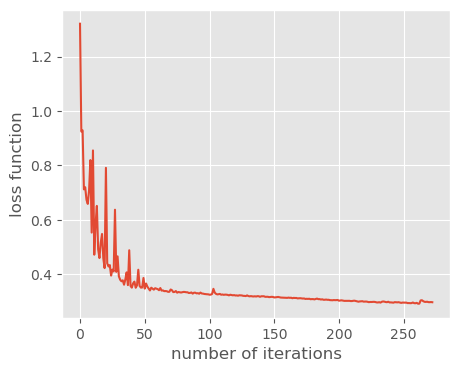

In [89]:
plt.figure(figsize=(5,4))
plt.plot(range(0,len(model_n1.loss_curve_)),model_n1.loss_curve_)
plt.ylabel('loss function')
plt.xlabel('number of iterations')
plt.show()

In [90]:
model_n1.best_loss_

0.2914400137995965

In [117]:
### verifying the improveement in the performance of the model after hyperparameter fine-tuning
calculations1={}
X_sets = [x_train_new,x_dev,X_test]
Y_sets = [y_train_new,y_dev,y_test]
Xs = ['training set','validation_set','testing_set']
for i in range(len(X_sets)):
    pred = model_n1.predict(X_sets[i])
    score = accuracy_score(Y_sets[i],pred)
    error = 1-score
    calculations1[Xs[i]]=[score,error]

In [118]:
calculations1

{'training set': [0.8614097051597052, 0.13859029484029484],
 'validation_set': [0.8429887410440123, 0.15701125895598766],
 'testing_set': [0.852200614124872, 0.14779938587512798]}

In [93]:
### Experiment 2
### number of iterations increased from 200 to 500
### number of hidden layers increased from 1 to 3 with number of units at default 100
model_n2 = MLPClassifier(max_iter=500, hidden_layer_sizes=(100,100,100), random_state=101)
model_n2.fit(x_train_new,y_train_new)

C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=500,
              random_state=101)

In [94]:
print(model_n2.max_iter,model_n2.best_loss_,model_n2.loss_)

500 0.3348994783622738 0.35573208674070983


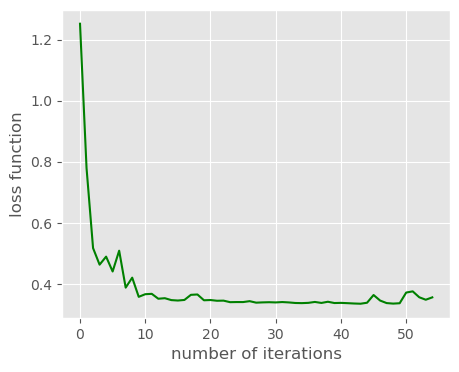

In [95]:
plt.figure(figsize=(5,4))
plt.plot(range(0,len(model_n2.loss_curve_)),model_n2.loss_curve_,'g-')
plt.ylabel('loss function')
plt.xlabel('number of iterations')
plt.show()

In [96]:
### verifying the improveement in the performance of the model after hyperparameter fine-tuning
calculations2={}
X_sets = [x_train_new,x_dev,X_test]
Y_sets = [y_train_new,y_dev,y_test]
Xs = ['training set','x-dev set','x-test set']
for i in range(len(X_sets)):
    pred = model_n2.predict(X_sets[i])
    score = accuracy_score(Y_sets[i],pred)
    error = 1-score
    calculations2[Xs[i]]=[score,error]

In [97]:
calculations2

{'training set': [0.835534398034398, 0.164465601965602],
 'x-dev set': [0.8245649948822927, 0.17543500511770727],
 'x-test set': [0.840532241555783, 0.159467758444217]}

In [120]:
calc2 = pd.DataFrame(calculations2, index=['accuracy', 'error']).T
calc1 = pd.DataFrame(calculations1, index=['accuracy', 'error']).T
calc = pd.DataFrame(calculations, index=['accuracy', 'error']).T

In [109]:
calc1

,accuracy,error
training set,0.861410,0.138590
x-dev set,0.842989,0.157011
x-test set,0.852201,0.147799


In [99]:
errors = pd.DataFrame({
    'initial model': calc['error'],
    'experiment1': calc1['error'],
    'experiment2': calc2['error']
})

In [100]:
errors

,initial model,experiment1,experiment2
training set,0.154458,0.138590,0.164466
x-dev set,0.157625,0.157011,0.175435
x-test set,0.148414,0.147799,0.159468


In [101]:
acc_scores = pd.DataFrame({
    'initial model': calc['accuracy'],
    'experiment1': calc1['accuracy'],
    'experiment2': calc2['accuracy']
})

In [102]:
acc_scores

,initial model,experiment1,experiment2
training set,0.845542,0.861410,0.835534
x-dev set,0.842375,0.842989,0.824565
x-test set,0.851586,0.852201,0.840532


#### Considering the accuracy scores of all three sets of Experiment 2 to calculate the error rate, the biggest difference is still between the training set error and the Bayes error. This means that the model may not be the best fit for the dataset, considering that the training set error could not be brought closer to the minimum possible error margin.

In [119]:
ds = pd.DataFrame({
    'gaussian_nb': {
        k: v['accuracy'] for k, v in scores_nb.items()
    },
    'decision_tree': {
        k: v['accuracy'] for k, v in scores_tree.items()
    },
    'svm': {
        k: v['accuracy'] for k, v in scores_svm.items()
    },
})


In [122]:
ds['mlp']=calc1['accuracy']
ds

,gaussian_nb,decision_tree,svm,mlp
training set,0.796094,0.967931,0.802237,0.861410
training_dev_set,0.840000,0.880000,0.850000,NaN
validation_set,0.802866,0.816377,0.806755,0.842989
testing_set,0.807165,0.825384,0.811259,0.852201


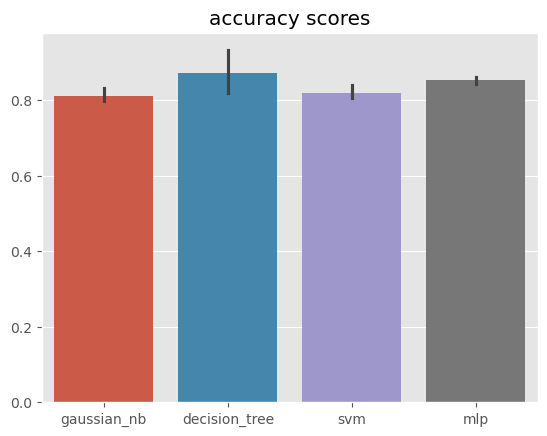

In [126]:
sns.barplot(ds,estimator=np.mean)
plt.title('accuracy scores')
plt.show()